# Getting Started with conx

## What is conx?

`conx` is an accessible and powerful way to build and understand deep learning neural networks. Specifically, it sits on top of Keras, which sits on top of Theano, TensorFlow, or CNTK. 

`conx`:

* has an easy to use interface for creating connections between layers of a neural network
* adds additional functionality for manipulating neural networks
* supports visualizations and analysis for training and using neural networks
* has everything you need; doesn't require knowledge of complicated numerical or plotting libraries
* integrates with lower-level (Keras) if you wish

But rather than attempting to explain each of these points, let's demonstrate them.

This demonstration is being run in a Jupyter Notebook. `conx` doesn't require running in the notebook, but if you do, you will be able to use the visualizations and dashboard.

## A Simple Network

As a demonstration, let's build a simple networkd for learning the XOR (exclusive or) truth table. XOR is defined as:

Input | Output
------|-------
 0, 0 | 0
 0, 1 | 1
 1, 0 | 2
 1, 1 | 0

### Step 1: import conx

We will need the Network, and Layer classes from the conx module:

In [26]:
from conx import Network, Layer

### Step 2: create the network

Every network needs a name:

In [27]:
net = Network("XOR Network")

### Step 3: add the needed layers

Every layer needs a name and a size. We add each of the layers of our network:

In [28]:
net.add(Layer("input", 2))
net.add(Layer("hidden", 5))
net.add(Layer("output", 1))

### Step 4: connect the layers

We connect up the layers as needed. This is a simple 3-layer network:

In [29]:
net.connect("input", "hidden")
net.connect("hidden", "output")

### Step 5: compile the network

Before we can do this step, we need to do two things:

1. tell the network how to compute the error between the targets and the actual outputs
2. tell the network how to adjust the weights when learning

#### Error (or loss)

The first option is called the `error` (or `loss`). There are many choices for the error function, and we'll dive into each later. For now, we'll just briefly mention them:

* "mse" - mean square error
* "mae" - mean absolute error
* "mape" - mean absolute percentage error
* "msle" - mean squared logarithmic error
* "kld" - kullback leibler divergence
* "cosine" - cosine proximity

#### Optimizer

The second option is called "optimizer". Again, there are many choices, but we just briefly name them here:

* "sgd" - Stochastic gradient descent optimizer
* "rmsprop" - RMS Prop optimizer
* "adagrad" - ADA gradient optimizer
* "adadelta" - ADA delta optimizer
* "adam" - [Adam optimizer](http://arxiv.org/abs/1412.6980v8)
* "adamax" - Adamax optimizer from Adam
* "nadam" - Nesterov Adam optimizer
* "tfoptimizer" - a native TensorFlow optimizer

For now, we'll just pick "mse" for the error function, and "adam" for the optimizer. 

And we compile the network:

In [32]:
net.compile(error="mse", optimizer="adam")

#### Option: visualize the networ

At this point in the steps, you can see a visual representation of the network by simply evaluating the network:

<IPython.core.display.Javascript object>

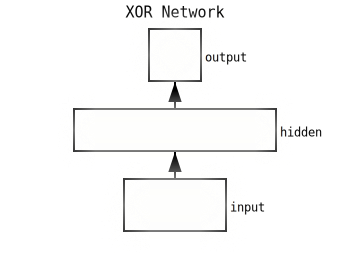

In [33]:
net

This is useful to see the layers and connections.

In [34]:
net.propagate([1, 0])

[0.045011353]

Propagating the network should show some colored squares in the layers in the above image. We can try any input vector:

In [35]:
net.propagate([0, 0])

[0.0]

Interestingly, if you propagate this network with zeros, then it will only have white activations. This means that there is no activation at any node in the network. This is because the bias units are initialized at zero.

### Step 6: setup the training data

In [36]:
data = []

## Now we append a list containing the input list, and the target list:

data.append([ [0, 0], [0] ])
data.append([ [0, 1], [1] ])
data.append([ [1, 0], [1] ])
data.append([ [1, 1], [0] ])

## and give it to the network

net.set_dataset(data)

### Step 7: train the network

In [39]:
net.train(epochs=1000, accuracy=1.0, report_rate=100)

Training...
Epoch #  100 | train error 0.31138 | train accuracy 0.50000 | validate% 0.00000
Epoch #  200 | train error 0.25865 | train accuracy 0.50000 | validate% 0.00000
Epoch #  300 | train error 0.25069 | train accuracy 0.50000 | validate% 0.00000
Epoch #  400 | train error 0.25004 | train accuracy 0.50000 | validate% 0.00000
Epoch #  500 | train error 0.25000 | train accuracy 0.25000 | validate% 0.00000
Epoch #  600 | train error 0.25000 | train accuracy 0.25000 | validate% 0.00000
Epoch #  700 | train error 0.25000 | train accuracy 0.25000 | validate% 0.00000
Epoch #  800 | train error 0.25000 | train accuracy 0.25000 | validate% 0.00000
Epoch #  900 | train error 0.25000 | train accuracy 0.50000 | validate% 0.00000
Epoch # 1000 | train error 0.25000 | train accuracy 0.50000 | validate% 0.00000
Epoch # 1001 | train error 0.25000 | train accuracy 0.50000 | validate% 0.00000


Perhaps the network learned none, some, or all of the patterns. You can reset the network, and try again (retrain). Or continue with the following steps.

In [41]:
net.reset()
net.retrain()

Training...
Epoch #  100 | train error 0.36840 | train accuracy 0.50000 | validate% 0.00000
Epoch #  200 | train error 0.27537 | train accuracy 0.50000 | validate% 0.00000
Epoch #  300 | train error 0.25312 | train accuracy 0.50000 | validate% 0.00000
Epoch #  400 | train error 0.25018 | train accuracy 0.50000 | validate% 0.00000
Epoch #  500 | train error 0.25000 | train accuracy 0.50000 | validate% 0.00000
Epoch #  600 | train error 0.25000 | train accuracy 0.50000 | validate% 0.00000
Epoch #  700 | train error 0.25000 | train accuracy 0.25000 | validate% 0.00000
Epoch #  800 | train error 0.25000 | train accuracy 0.25000 | validate% 0.00000
Epoch #  900 | train error 0.25000 | train accuracy 0.25000 | validate% 0.00000
Epoch # 1000 | train error 0.25000 | train accuracy 0.50000 | validate% 0.00000
Epoch # 1000 | train error 0.25000 | train accuracy 0.50000 | validate% 0.00000


### Step 8: test the network

In [42]:
net.test()

Testing on training dataset._..
# | inputs | targets | outputs | result
---------------------------------------
0 | [0.0, 0.0] | [0.0] | [0.5] | X
1 | [0.0, 1.0] | [1.0] | [0.5] | X
2 | [1.0, 0.0] | [1.0] | [0.5] | X
3 | [1.0, 1.0] | [0.0] | [0.5] | X
Total count: 4
Total percentage correct: 0.0


## conx options

### The dashboard

The dashboard allows you to interact, test, and generally work with your network via a GUI.

In [43]:
net.dashboard()

<IPython.core.display.Javascript object>

### Propagation enhancements

In [44]:
net.propagate_from("hidden", [0, 1, 0, 0, 1])

[-1.5875351]

In [45]:
net.propagate_to("hidden", [0.5, 0.5])

[0.41368645429611206,
 -0.019015222787857056,
 -0.5838273763656616,
 0.2169715166091919,
 0.033011168241500854]

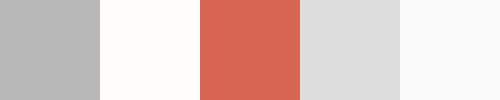

In [47]:
net.propagate_to_image("hidden", [0.5, 0.5]).resize((500, 100))

### Plotting options

TODO